Optimal K: 100


c:\Users\tanve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\tanve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\tanve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "c:\Users\tanve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response

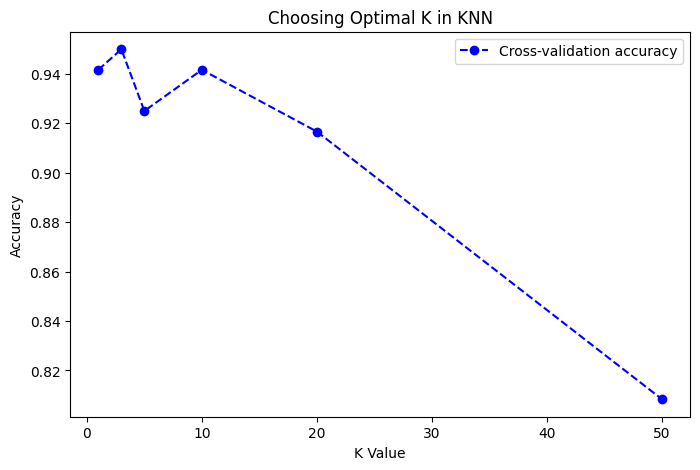

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define K values to test
k_values = [1, 3, 5, 10, 20, 50, 100, 200]
cv_scores = []  # Store accuracy scores for each K

# Loop through different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', n_jobs=-1)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store mean accuracy score
    cv_scores.append(np.mean(scores))

# Find the best K
best_k = k_values[np.argmax(cv_scores)]
print(f'Optimal K: {best_k}')

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b', label="Cross-validation accuracy")
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Choosing Optimal K in KNN')
plt.legend()
plt.show()
